In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

#### Información general del set de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#### Muestra aleatoria del set de datos

In [4]:
df.sample(5)

,id,keyword,location,text,target
5936,8477,screamed,PA.USA,I SCREAMED AT THE END OAMSGAJAGAHAHAH IM LAIGH...,0
7030,10075,typhoon,USA,Typhoon Soudelor taking dead aim at Taiwan htt...,1
6418,9177,suicide%20bomber,Moscow,Suicide Bomber Kills 13 At SaudiåÊMosque http:...,1
1908,2743,crushed,NaN,So many Youtube commenters saying the Dothraki...,1
5839,8345,ruin,"Nashville, TN",If I can't ruin his mood then I may have lost ...,0


#### Descripción de variables estadísticas del set de datos

In [5]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [6]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Verificación de duplicados

In [7]:
len(df.drop_duplicates())

7613

No hay filas duplicadas

# Análisis Exploratorio

En este análisis se intentará encontrar la relación entre las keyword y los target.

In [8]:
#Cantidad de filas del dataframe
len(df)

7613

In [9]:
#Cantidad de filas del dataframe con keywords
df["keyword"].count()

7552

In [10]:
#Porcentaje de filas con keyword respecto al total
round(df["keyword"].count()/len(df)*100, 2)

99.2

In [11]:
#Cantidad de valores diferentes de keyword junto con su frecuencia
df["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
#Cantidad de apariciones de cada keyword en el target 1
k1 = df[df["target"]==1]["keyword"].value_counts()
k1

derailment     39
outbreak       39
wreckage       39
oil%20spill    37
debris         37
               ..
electrocute     1
ruin            1
blazing         1
body%20bag      1
epicentre       1
Name: keyword, Length: 220, dtype: int64

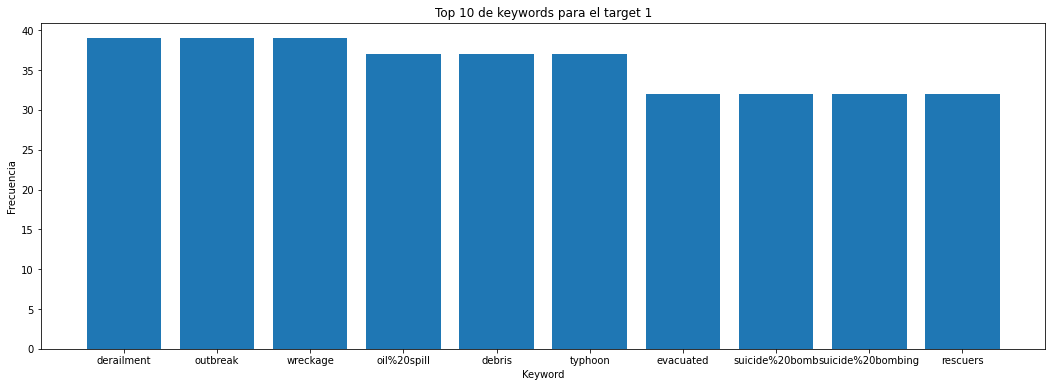

In [13]:
plt.figure(figsize=(18, 6))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de keywords para el target 1")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
k0 = df[df["target"]==0]["keyword"].value_counts() #Cantidad de apariciones de cada keyword en el target 0
k0

body%20bags          40
armageddon           37
harm                 37
wrecked              36
ruin                 36
                     ..
oil%20spill           1
suicide%20bomber      1
typhoon               1
outbreak              1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: int64

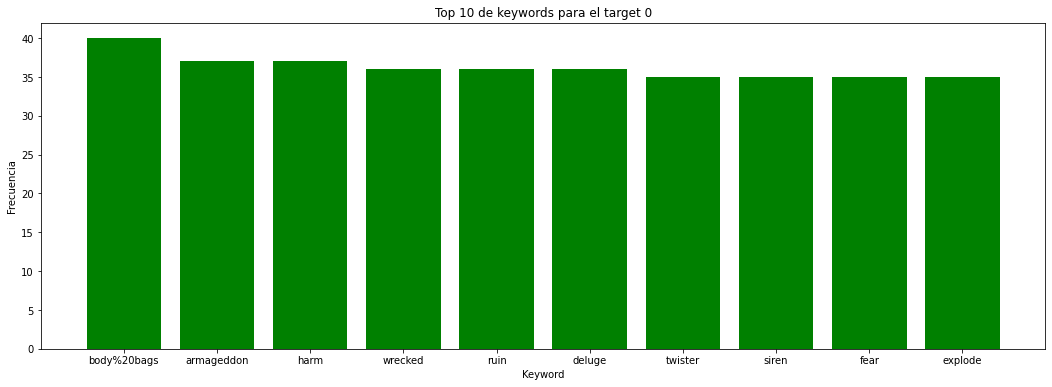

In [15]:
plt.figure(figsize=(18, 6))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de keywords para el target 0")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [16]:
k1_unique = pd.Series(dtype='float64')
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [17]:
#Keywords que solo aparecen en el target 1
k1_unique

derailment    39
wreckage      39
debris        37
dtype: int64

In [18]:
k0_unique = pd.Series(dtype='uint8')
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [19]:
#Keywords que solo aparecen en el target 0
k0_unique

aftershock    34
dtype: int64

In [20]:
df_keywords_en_ambas = pd.DataFrame(columns=["keyword", "target_1", "target_0", "relacion_1_sobre_0"])

In [21]:
for x in df["keyword"].value_counts().iteritems():
    if x[0] in k1_unique.index or x[0] in k0_unique.index:
        continue
    df_keywords_en_ambas = df_keywords_en_ambas.append({"keyword":x[0], \
                                                        "target_1":k1[x[0]], \
                                                        "target_0":k0[x[0]]}, \
                                                       ignore_index=True)

In [22]:
df_keywords_en_ambas["relacion_1_sobre_0"] = (df_keywords_en_ambas["target_1"]/df_keywords_en_ambas["target_0"])

In [23]:
#Keywords que están en ambos targets junto con su cantidad en cada uno y la relación del 1 sobre 0
df_keywords_en_ambas

,keyword,target_1,target_0,relacion_1_sobre_0
0,fatalities,26,19,1.36842
1,armageddon,5,37,0.135135
2,deluge,6,36,0.166667
3,harm,4,37,0.108108
4,sinking,8,33,0.242424
...,...,...,...,...
212,forest%20fire,15,4,3.75
213,epicentre,1,11,0.0909091
214,threat,2,9,0.222222
215,inundation,2,8,0.25


In [24]:
df_keywords_casi_unicas = df_keywords_en_ambas.groupby("keyword")\
.filter(lambda x: x["relacion_1_sobre_0"].max()<0.1 or \
                  x["relacion_1_sobre_0"].max()>10)

#Keywords con una relación mayor o igual de 10 a 1 respecto de un target con otro
df_keywords_casi_unicas

,keyword,target_1,target_0,relacion_1_sobre_0
5,body%20bags,1,40,0.025
13,outbreak,39,1,39
19,wrecked,3,36,0.0833333
28,explode,3,35,0.0857143
33,oil%20spill,37,1,37
39,typhoon,37,1,37
54,ruin,1,36,0.0277778
59,panic,3,34,0.0882353
60,screaming,2,34,0.0588235
95,traumatised,2,33,0.0606061


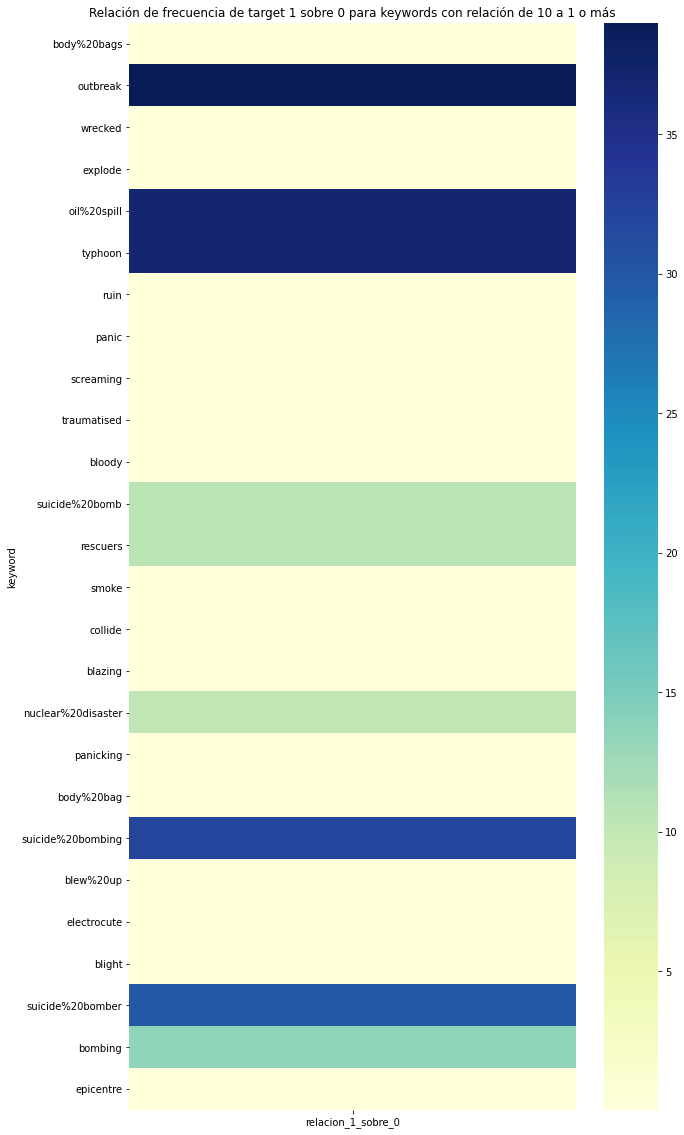

In [25]:
df_heat = df_keywords_casi_unicas.drop(["target_1", "target_0"], axis=1)
df_heat["relacion_1_sobre_0"] = df_heat["relacion_1_sobre_0"].map(lambda x:float(x))
df_heat = df_heat.set_index("keyword")
plt.figure(figsize=(10,20))
plt.title("Relación de frecuencia de target 1 sobre 0 para keywords con relación de 10 a 1 o más")
sns.heatmap(df_heat[["relacion_1_sobre_0"]], cmap="YlGnBu")
plt.show()

Como se pudo ver, hay algunas keywords que son únicas para cada target, y su cantidad es suficientemente alta como para decir que si aparece otra vez, ya sabemos a que target pertenecerá. Por otro lado hay otras que aparecen en ambos pero la cantidad es mucho mayor en uno que en otro, por lo que tenemos una alta probabilidad de adivinar si aparece nuevamente.